## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [49]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [50]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [51]:
#The number of rows in the dataset.
df.shape[0]

294478

c. The number of unique users in the dataset.

In [52]:
#The number of unique users in the dataset.
df.user_id.nunique()

290584

d. The proportion of users converted.

In [53]:
#The proportion of users converted. 
df.converted.mean()

0.11965919355605512

In [54]:
# or; if it wasn't only 1s and 0s this would be the approach )
df.query('converted==1').user_id.nunique()/df.user_id.nunique()
df.query('converted==1').user_id.count()/df.user_id.count()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [55]:
# The number of times the new_page and treatment don't match.
num_mismatch = df.user_id.count() - df.query('(group=="control" & landing_page=="old_page") or (group=="treatment" & landing_page=="new_page") ').user_id.count()
num_mismatch

3893

In [56]:
# another approach 
# part1 for dismatch.
part1 = df.query('group!="treatment" and landing_page=="new_page"').user_id.count()
part1

1928

In [57]:
# part2 for dismatch.
part2= df.query('group=="treatment" and landing_page!="new_page"').user_id.count()
part2 

1965

In [58]:
# throw error if the calculation is wrong 
assert part1+part2 == num_mismatch

f. Do any of the rows have missing values?

In [59]:
# method1 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [60]:
#method 2 
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [61]:
# we should remove those rows as we can't be sure which column is valid
df2=df.query('(group=="control" & landing_page=="old_page") or (group=="treatment" & landing_page=="new_page") ')

In [62]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [63]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [64]:
# The user_id for the non-unique id in df2.
df2[df2.user_id.duplicated()].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [65]:
df2.query('user_id==773192' )

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [66]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/
df2.drop_duplicates(subset ="user_id", inplace = True) 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [67]:
# re-check if there're any duplicates : 
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted


In [68]:
# re-check previosly duplicated user_id
df2.query('user_id==773192' )

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [69]:
df.converted.mean()

0.11965919355605512

b. Given that an individual was in the `control` group, what is the probability they converted?

In [70]:
df.query('group=="control"').converted.mean()

0.12039917935897611

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [71]:
df.query('group=="treatment"').converted.mean()

0.11891957956489856

d. What is the probability that an individual received the new page?

In [72]:
df.query('landing_page=="new_page"').user_id.count()/df.user_id.count()

0.5

In [73]:
diff = df.query('group=="treatment"').converted.mean() - df.query('group=="control"').converted.mean()
diff

-0.0014795997940775518

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

Although it's a minor change, proportion of coversions reduced by 0.00148 which means there's no sufficient evidence to say that the new treatment page leads to more conversions ; or we can say there's not sufficient data to reject NULL yet.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**NULL Hypothesis:** mean conversion of control is smaller than or equal to the mean quality of treatment )

$$H_0: p_{new} ≤ p_{old}$$  

**Alternative Hypothesis:** mean conversion of treatment is larger than the mean quality of new page )

$$H_1: p_{new} >> p_{old}$$ 


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [74]:
# In this case, assuming under null hypothesis means p_old is equal to p_new 
# proportions calculated regardless of page type 
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [75]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [76]:
# Use a sample size for each page equal to the ones in ab_data.csv.
# to better understand question use link https://knowledge.udacity.com/questions/110838
n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [77]:
# Use a sample size for each page equal to the ones in ab_data.csv.
# to better understand question use link https://knowledge.udacity.com/questions/110838
n_old = df2.query('landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [78]:
# https://knowledge.udacity.com/questions/43192
# We'll use numpy's random.choice to simulate 145310 draws of 1 or 0
np.random.seed(100)
new_page_converted = np.random.choice([0, 1], n_new, replace=True, p = [1-p_new, p_new])
new_page_converted
# Or we can use numpy's binomial distribution
# new_page_converted_v2 = np.random.binomial(1, p_new, n_new)
new_mean=new_page_converted.mean()
new_mean

0.11903516619640768

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [79]:
# We'll use numpy's random.choice to simulate 145274 draws of 1 or 0
np.random.seed(100)
old_page_converted = np.random.choice([0, 1], n_old, replace=True, p = [1-p_old, p_old])
old_page_converted

# Or we can use numpy's binomial distribution
# old_page_converted_v2 = np.random.binomial(1, p_old, n_old)
old_mean=old_page_converted.mean()
old_mean

0.11904401338160993

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [80]:
observed_diff = new_mean-old_mean
observed_diff

-8.8471852022486974e-06

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [81]:
#Simulate 10000 samples of the differences in conversion rates
np.random.seed(100)
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], n_new, replace=True, p = [1-p_new, p_new])
    old_page_converted = np.random.choice([0, 1], n_old, replace=True, p = [1-p_old, p_old])
    p_diffs.append(new_page_converted.mean()-old_page_converted.mean())
# convert list to array
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

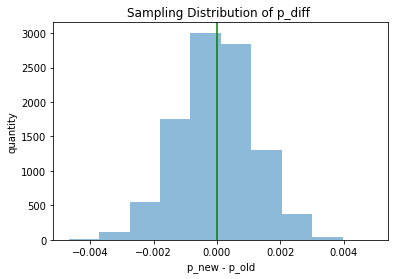

In [82]:
plt.hist(p_diffs,alpha=.5);
plt.title('Sampling Distribution of p_diff ')
plt.xlabel('p_new - p_old') 
plt.ylabel('quantity') 
plt.axvline(x= observed_diff, color='g'); 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [83]:
#Actual difference of converted rates
actual_diff = df.query('group=="treatment"').converted.mean() - df.query('group=="control"').converted.mean() 
actual_diff

-0.0014795997940775518

In [84]:
# filter only the ones higher than -0.0016367945992569882 
# probability of a statistic being higher than observed
(p_diffs>actual_diff).mean()

0.88870000000000005

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**p-value:** The probability of the observed change in average converted rate occurring or an average change even more in favor of an increase in converted rate given there was actually no change in converted rate ( or given that Null Hyphothesis is True )

Large p_value suggests that we shouldn't move away from NULL; which means NULL HYPOTHESIS IS CORRECT and Alternative is wrong.

In our case,this means we should stay on the old version of our page. 


**type-1 error:** We can also make our decision about which hypothesis we will choose by comparing our p-value to our type I error threshold ($α$ = 5% ): 

- $ p-value <= alpha $ => Reject NULL $H_0$ (choose alternative ) 


- $ p-value > alpha$ => Fail to Reject NULL $H_0H$ (choose null )

It looks p_value = 0.9162 ; much larger than 5% suggests we don't have enough data to reject NULL. This is another way to confirm our statement.



l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [85]:
# https://knowledge.udacity.com/questions/25616
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" & converted==1').shape[0]
convert_new = df2.query('landing_page == "new_page" & converted==1').shape[0]
n_old = df2.query('landing_page == "old_page" ').shape[0]
n_new = df2.query('landing_page == "new_page" ').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [86]:
# https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/
#stat, pval = proportions_ztest(counts, nobs)
counts = [convert_new,convert_old]
nobs = [n_new,n_old]
z_score, p_val = sm.stats.proportions_ztest(counts,nobs,alternative='larger')
z_score, p_val

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**results:** 
- z_score = -1.311
- p_val = 0.905

**findings:**
p-value calculated by Z-Test is very close to the one we calculated with the bootstrapped hypothesis testing. High p-value means we don't have sufficient data to reject null which is also suggested by the negative z-score calculates


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

In statistics, the logistic model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion

- Predicts a probability between 0 and 1

- Explanatory variables can be either categorical or quantitative.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [87]:
df2.head(3)
# create a column for the intercept
df2['intercept'] = 1
# create a dummy variable column for which page each user received
group_dummies = pd.get_dummies(df['group'])
df_new = df2.join(group_dummies)
df_new.head(3)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1


In [88]:
# rename treatment column as ab_page (which is 1 when an individual receives the treatment )
df_new = df_new.rename({'treatment': 'ab_page'}, axis=1)
# drop unnecessary columns
df_new.drop(['group','control'],axis=1, inplace=True )
df_new.head()

,user_id,timestamp,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [89]:
## Now we will use logit model of Stats Library https://www.statsmodels.org/devel/discretemod.html
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [90]:
# https://github.com/statsmodels/statsmodels/issues/3931
# to prevent : AttributeError: module 'scipy.stats' has no attribute 'chisqprob'
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 31 May 2020   Pseudo R-squ.:               8.077e-06
Time:                        17:33:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

p_val = 0.190 in this case whereas it was calculated as 0.905 in Part II. However this is due to an updates on hypothesis tests which are as below now : 

$$H_0: p_{new} = p_{old}$$  

$$H_1: p_{new} != p_{old}$$  

Because the logistic regression provides only two possible outcomes - whether mean conversion of new pages is equal to the mean quality of mean conversion of old pages (NULL) or not (ALTERNATIVE) 

Furthermore, the p-value (0.190) here remains above an $\alpha$ level of 0.05; which suggests we don't have sufficient data to reject the null, as also suggested in Part 2. 

- $ p-value > alpha$ => Fail to Reject NULL $H_0$ (choose null )


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?


Obviously it's a good idea to consider other variables which might be corrlated, however we could take into consideration the five potential problems related to Multiple Linear Regression :

- Non-linearity of the response-predictor relationships
- Correlation of error terms
- Non-constant Variance and Normally Distributed Errors
- Outliers/ High leverage points
- Multicollinearity


In this case we can have Multi-collinearity issue :

**Multicollinearity** is when we have predictor variables that are correlated with one another. One of the main concerns of multicollinearity is that it can lead to coefficients being flipped from the direction we expect from simple linear regression.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.



In [91]:
countries_df = pd.read_csv('./countries.csv')
df_final = countries_df.set_index('user_id').join(df_new.set_index('user_id'), how='inner')

In [92]:
df_final.head()

,country,timestamp,landing_page,converted,intercept,ab_page
user_id,,,,,,
834778,UK,2017-01-14 23:08:43.304998,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,new_page,0,1,1


In [93]:
### Create the necessary dummy variables
country_dummies = pd.get_dummies(df_final['country'])
df_final = df_final.join(country_dummies)
df_final.head(3)

,country,timestamp,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,new_page,1,1,1,0,1,0


In [94]:
# drop unnecessary column and the extra one not needed 
df_final.drop(['country','US'],axis=1, inplace=True )
df_final.head(3)

,timestamp,landing_page,converted,intercept,ab_page,CA,UK
user_id,,,,,,,
834778,2017-01-14 23:08:43.304998,old_page,0,1,0,0,1
928468,2017-01-23 14:44:16.387854,new_page,0,1,1,0,0
822059,2017-01-16 14:04:14.719771,new_page,1,1,1,0,1


In [95]:
### Fit Your Linear Model And Obtain the Results
## Now we will use logit model of Stats Library https://www.statsmodels.org/devel/discretemod.html
logit_mod = sm.Logit(df_final['converted'], df_final[['intercept', 'ab_page','CA','UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 31 May 2020   Pseudo R-squ.:               2.323e-05
Time:                        17:33:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

### Udacity Reviews : 

**Required** Part III (h) : your conclusions are correct however this is little tricky as we here like to find if there is an interaction between page and country to see if there significant effects on conversion. so you need to create additional interaction columns .
hint:

```
df_final['UK_ab_page'] = df_final['UK'] * df_final['ab_page']
df_final['CA_ab_page'] = df_final['CA'] * df_final['ab_page']
```

=> fit the model again with the new columns ,provide results and put your conclusion according to obtained results

In [97]:
df_final['UK_ab_page'] = df_final['UK'] * df_final['ab_page']

In [98]:
df_final['CA_ab_page'] = df_final['CA'] * df_final['ab_page']

In [99]:
df_final.head()

,timestamp,landing_page,converted,intercept,ab_page,CA,UK,UK_ab_page,CA_ab_page
user_id,,,,,,,,,
834778,2017-01-14 23:08:43.304998,old_page,0,1,0,0,1,0,0
928468,2017-01-23 14:44:16.387854,new_page,0,1,1,0,0,0,0
822059,2017-01-16 14:04:14.719771,new_page,1,1,1,0,1,1,0
711597,2017-01-22 03:14:24.763511,old_page,0,1,0,0,1,0,0
710616,2017-01-16 13:14:44.000513,new_page,0,1,1,0,1,1,0


In [100]:
### Fit Your Linear Model And Obtain the Results
## Now we will use logit model of Stats Library https://www.statsmodels.org/devel/discretemod.html
logit_mod = sm.Logit(df_final['converted'], df_final[['intercept', 'ab_page','CA','UK','UK_ab_page','CA_ab_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 31 May 2020   Pseudo R-squ.:               3.482e-05
Time:                        17:36:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
UK_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
CA_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
==============================================================================
"""


**Findings:** This has changed the conclusions however once more it seems variables do not have significant p-values (since all of them are below error threshold ). So we can come up with the conclusion that although there's a small correlation between country and page received; there is not sufficient evidence to reject NULL in this analysis.


<a id='conclusions'></a>

## Conclusions

**NULL Hypothesis:** mean conversion of new pages is smaller than or equal to the mean quality of mean conversion of old pages

**Alternative Hypothesis:** mean conversion of new pages is larger than the mean quality of mean conversion of old pages 

$$H_0: p_{new} ≤ p_{old}$$  
$$H_1: p_{new} >> p_{old}$$ 


#### In Part 1 of this project we calculated p_value by using sampling distribution of difference in conversion rate across 10000 random draws. 

**p-value:** The probability of the observed change in average converted rate occurring or an average change even more in favor of an increase in converted rate given there was actually no change in converted rate ( or given that Null Hyphothesis is True )

Large p_value suggests that we shouldn't move away from NULL; which means NULL HYPOTHESIS IS CORRECT and Alternative is wrong.

As a result , p_value(0.8887) suggests we should stay on the old version of our page. 

Furthermore,  we can make our decision y comparing our p-value to **type-1 error** : 

- our type I error threshold ($α$ = 5% ), about which hypothesis we will choose : 


- $ p-value <= alpha $ => Reject NULL $H_0$ (choose alternative ) 


- $ p-value > alpha$ => Fail to Reject NULL $H_0$ (choose null )

**Findings:** So in our case p_value = 0.8887 ; much larger than 5% suggests we've enough data to reject

#### In Part 2 of this project we've proceeded with a built function to run Z-Test ( sm.stats.proportions_ztest ) to confirm our findings : 

**outputs:** 
- z_score = -1.311
- p_val = 0.905

**Findings:** p-value calculated by Z-Test is very close to the one we calculated with the bootstrapped approach. High p-value means we don't have sufficient data to reject null which is also suggested by the negative z-score calculates


#### Finally in Part-3 we used Logistic Regression  which is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. 


Although the new p_val = 0.190 in this case is much smaller than the ones calculate previously; this is due to an updates on hypothesis tests in Logistic Regression ( instead of larger or smaller, we're only taking equal or not)  : 

$$H_0: p_{new} = p_{old}$$  

$$H_1: p_{new} != p_{old}$$  

The logistic regression provides only two possible outcomes - whether mean conversion of new pages is equal to the mean quality of mean conversion of old pages (NULL) or not (ALTERNATIVE) 

As another cross-check, the p-value (0.190) here remains above an $\alpha$ level of 0.05; which suggests we don't have sufficient data to reject the null, as also suggested in Part 2. 

- $ p-value > alpha$ => Fail to Reject NULL $H_0$ (choose null )


#### In the last step,  Logistic Regression with multiple variables, 

the p-values (0.191,0.130 and 0.457) calculated are again above $\alpha$ level of 0.05; which once more suggests we don't have sufficient data to reject the null, as also suggested in Part 2 and Part 3. 

- $ p-value > alpha$ => Fail to Reject NULL $H_0$ (choose null )

Here we should take into consideration **Multicollinearity** ( one of the five potential problems related to Multiple Linear Regression ) which mentiones if variables used as inputs are already correlated with one another; the coefficients might be flipped from the direction we expect from simple linear regression

#### Closing is there an interaction between page and country ? If so, are there significant effects on conversion

**Findings:** This has changed the conclusions however once more it seems variables do not have significant p-values (since all of them are below error threshold ). So we can come up with the conclusion that although there's a small correlation between country and page received; there is not sufficient evidence to reject NULL in this analysis.


## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [96]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0